## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [37]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


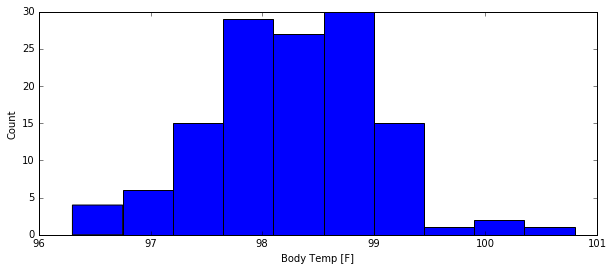

In [23]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1,figsize=(10,4))
axes.hist(df.temperature)
axes.set_xlabel('Body Temp [F]')
axes.set_ylabel('Count')

#df.temperature.plot(kind='hist')

2.Is the true population mean really 98.6 degrees F?

In [47]:
#H0 - True population mean is 98.6 degrees 
#H1 - True population mean is not 98.6 degree
#Significance level = .05 or 5%
#The temp distribution appears to be normal and also the sample size is greater than 30 we can use z test statictis


#Significance level
alpha = 0.05


#sample stats
n = len(df.temperature)
mean = df.temperature.mean()
sigma = df.temperature.std()

#usamp mean of sampling distribution
upop = 98.6
usamp = 98.6 #For H0 to be true

#sigma_samp - standard deviaiton of sampling distribution
sigma_samp = sigma/np.sqrt(n)

#xCompute z statitics|
z_stat = (upop - mean)/sigma_samp
z_stat    # z stat come to be arnd 5.45 meaning 5 standard deviation away from mean.. with critcal value of 1.64(5% aplha)
          # we are falling into critical region and hence we will reject null hypothesis

#Comput the p value
p_val = stats.norm.cdf(mean,upop,sigma_samp)
p_val

if p_val < alpha:
    print 'P - value is',p_val
    print 'p - value < than significanc level of 5% so we reject the null hypothesis. Avg. bod temp is not 98.6F '
else:    
    print 'P - value is',p_val
    print 'P- value >= greater than significanc level of 5% so we do not reject the null hypothesis. Avg. bod temp is 98.6F '

P - value is 2.45107850706e-08
p - value < than significanc level of 5% so we reject the null hypothesis. Avg. bod temp is not 98.6F 


3.At what temperature should we consider someone's temperature to be "abnormal"?


In [128]:
#95% conidence interval around mean
ci = stats.norm.ppf(.95,mean-98.2,sigma_samp) 
print 'conf interval is ',mean - ci, 'to',mean+ci

z= stats.norm.ppf(0.95)
margin_err = z*sigma_samp
print 'margin of error =', margin_err *100,'%'

conf interval is  98.0942286467 to 98.4042328917
margin of error = 10.5771353265 %


4.Is there a significant difference between males and females in normal temperature?

In [129]:

df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [152]:
#H0 There is no diff between male and female body temp 
#H1 There is diff between male and female body temp

female = df[df.gender == 'F']
male   = df[df.gender=='M']            

#female sample stats
nf = len(female.temperature)
fmean = female.temperature.mean()
fsigma = female.temperature.std()

#male sample stats
nm = len(male.temperature)
mmean = male.temperature.mean()
msigma = male.temperature.std()

#Diff between sample mean
mean_diff = fmean- mmean

#std of diff between sample dist
sigma_diff = np.sqrt((fsigma**2/nf) + (msigma**2/nm))

p_val= 2*stats.norm.cdf(0,mean_diff,sigma_diff)

p_val

if p_val < alpha:
    print 'P - value is',p_val
    print 'p - value < than significanc level of 5% so we reject the null hypothesis. There is diff between male and female body temp   '
else:    
    print 'P - value is',p_val
    print 'P- value >= greater than significanc level of 5% so we do not reject the null hypothesis.There is no diff between male and female body temp  '

    
#critical value at significance level of 5% is 
crit_val = stats.norm.ppf(.95,0,1) #this is fo rnormal dist
    
#Also can be done this way    
if(mean_diff > crit_val*sigma_diff ): #We are in the critical area   
    print 'we reject null hypothesis'
else:
    print ' we accept null hypothesis'

P - value is 0.0222873607607
p - value < than significanc level of 5% so we reject the null hypothesis. There is diff between male and female body temp   
we reject null hypothesis


In [146]:
stats.norm.ppf(.95,0,1)

1.6448536269514722

In [159]:
z_stat

5.4548232923640789